<a href="https://colab.research.google.com/github/mafaldasalomao/PAVIC_computer_vision/blob/main/Aula_02_Treinamento__Visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libs
import cv2 as cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches
from skimage import io
from PIL import Image as im

MATLAB CODE


```
close all; clear;

im1 = im2gray( imread('angiography_live_ image.bmp'));
im2 = im2gray( imread('angiography_mask_image.bmp'));

imdiff= double(im2)-double(im1);
imdiff2= double(im1)-double(im2);

figure; imshow(im1)
figure; imshow(im2)
figure; imshow(imdiff,[])
figure; imshow(imdiff2,[])

myROI = imdiff(317:406,130:215);

figure; imshow(myROI,[])
```



In [ ]:
#Read the images
im1 = mpimg.imread("/content/angiography_live_ image.tif")
im2 = mpimg.imread("/content/angiography_mask_image.tif")

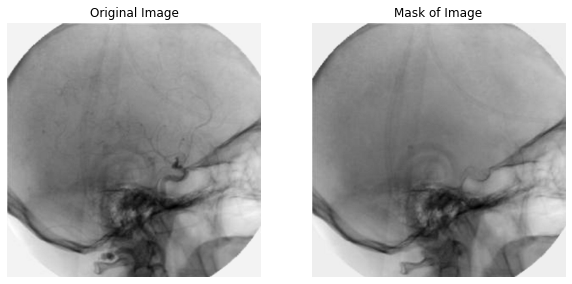

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7));

fig.add_subplot(1, 2, 1);
plt.title("Original Image")
plt.axis('off')
plt.imshow(im1, cmap='gray');
fig.add_subplot(1, 2, 2);
plt.title("Mask of Image")
plt.axis('off')
plt.imshow(im2, cmap='gray');

In [ ]:
img_result = im1 - im2

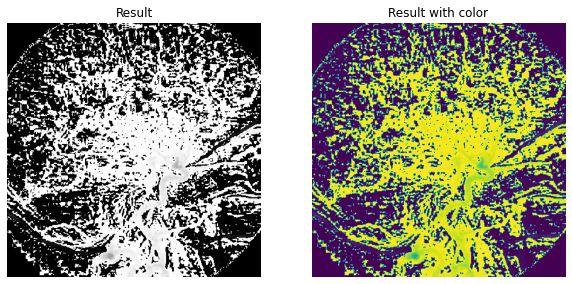

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7));
fig.add_subplot(1, 2, 1)
plt.title("Result")
plt.axis('off')
plt.imshow(img_result, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.title("Result with color")
plt.axis('off')
plt.imshow(img_result);


## Halftoning

In [ ]:


im1 = mpimg.imread("/content/cameraman.tif")# Get the size of image
print(im1.shape)
w, h = im1.shape
w, h

(512, 512)


(512, 512)

In [ ]:
submatriz = np.matrix([[0, 0, 0],
                  [0, 0, 0], 
                  [0, 0, 0]])
print(submatriz)
a = np.empty((3,0))
print(a)
np.concatenate((a, submatriz), axis=-1)

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[]


matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
im_resposta = np.empty((0, 1536))
for row in range(w):
  im_resposta_row = np.empty((3,0));
  for col in range(h):
    pixel=im1[row, col]
    if pixel >=0 and pixel < 28:
      submatriz = np.matrix([[0, 0, 0],
                  [0, 0, 0], 
                  [0, 0, 0]])

    elif pixel >= 28 and pixel < 57:
      submatriz = np.matrix([[0, 1, 0],
                   [0, 0, 0],
                   [0, 0, 0]])
    elif pixel >= 57 and pixel < 85:
      submatriz = np.matrix([[0, 1, 0],
                   [0, 0, 0],
                   [0, 0, 1]])
    elif pixel >= 85 and pixel < 113:
      submatriz = np.matrix([[1, 1, 0],
                   [0, 0, 0], 
                   [0, 0, 1]])
    elif pixel >= 113 and pixel < 142: # % pattern 4
      submatriz = np.matrix([[1, 1, 0],
                   [0, 0, 0],
                   [1, 0, 1]])
    elif pixel >= 142 and pixel < 170: # % pattern 5
      submatriz = np.matrix([[1, 1, 1],
                   [0, 0, 0], 
                   [1, 0, 1]])
    elif pixel >= 170 and pixel < 198: # % pattern 6
      submatriz = np.matrix([[1, 1, 1],
                   [0, 0, 1],
                   [1, 0, 1]])
    elif pixel >= 198 and pixel < 227: #% pattern 7
      submatriz = np.matrix([[1, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]])
    elif pixel >= 227 and pixel < 255: # % pattern 8
      submatriz = np.matrix([[1, 1, 1], 
                   [1, 0, 1],
                   [1, 1, 1]])
    else:
      submatriz = np.matrix([[1, 1, 1],
                   [1, 1, 1],
                  [1, 1, 1]])
      
    im_resposta_row = np.concatenate((im_resposta_row, submatriz), axis=-1)#[im_resposta_row, submatriz]
  im_resposta = np.concatenate((im_resposta, im_resposta_row), axis=0)#[im_resposta, im_resposta_row]

In [ ]:
im_resposta_row.shape

(3, 1536)

In [ ]:
im_resposta.shape

(1260, 1260)

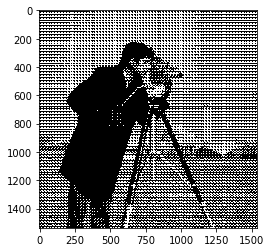

In [ ]:
plt.imshow(im_resposta, interpolation='nearest', cmap='gray')
plt.show()


In [ ]:
im_new = im.fromarray(im_resposta)
#im_new = im_new.convert("L")
im_new.show()
image_filename = "opengenus_image.jpeg"
im_new.save('test.jpeg')

OSError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:706: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: ignored

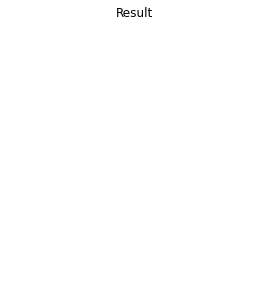

In [ ]:
#create figure
fig = plt.figure(figsize=(10, 7));
fig.add_subplot(1, 2, 1)
plt.title("Result")
plt.axis('off')
plt.imshow(im_resposta, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.title("Result with color")
plt.axis('off')
plt.imshow(img_result);